# Word2vec

Файл cinics.txt, в той же папке, что и программа

In [1]:
with open('cinics.txt', 'r', encoding='utf-8') as f:
    text = f.read()

Разделение текста на предложения

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
all_words = nltk.word_tokenize(text)
print(all_words[0:30])

['Анатолий', 'Мариенгоф', '.', 'Циники', 'роман', 'Почему', 'может', 'быть', 'признан', 'виновным', 'историк', ',', 'верно', 'следующий', 'мельчайшим', 'подробностям', 'рассказа', ',', 'находящегося', 'в', 'его', 'распоряжении', '?', 'Его', 'ли', 'вина', ',', 'если', 'действующие', 'лица']


In [51]:
lemms = []
for one_word in all_words:
    parseword = morph.parse(one_word)
    if parseword[0].tag.POS != None:
        lemms.append(parseword[0][2])

In [52]:
lemms[0:10]

['анатолий',
 'мариенгоф',
 'циник',
 'роман',
 'почему',
 'мочь',
 'быть',
 'признанный',
 'виновный',
 'историк']

In [53]:
with open('cinics_w2v_lemm.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(lemms))

In [54]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
#import urllib.request
#from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from gensim.models import word2vec

import warnings
warnings.filterwarnings('ignore')

In [80]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [55]:
f = 'cinics_w2v_lemm.txt'
data = gensim.models.word2vec.LineSentence(f)

In [63]:
%time model_cinics = gensim.models.Word2Vec(data, size=300, window=5, min_count=5, iter=100)

2020-06-13 12:35:00,146 : INFO : collecting all words and their counts
2020-06-13 12:35:00,168 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-13 12:35:00,295 : INFO : collected 6366 word types from a corpus of 21299 raw words and 3 sentences
2020-06-13 12:35:00,319 : INFO : Loading a fresh vocabulary
2020-06-13 12:35:00,682 : INFO : effective_min_count=5 retains 671 unique words (10% of original 6366, drops 5695)
2020-06-13 12:35:00,692 : INFO : effective_min_count=5 leaves 12884 word corpus (60% of original 21299, drops 8415)
2020-06-13 12:35:00,789 : INFO : deleting the raw counts dictionary of 6366 items
2020-06-13 12:35:00,797 : INFO : sample=0.001 downsamples 61 most-common words
2020-06-13 12:35:00,813 : INFO : downsampling leaves estimated 8700 word corpus (67.5% of prior 12884)
2020-06-13 12:35:00,825 : INFO : estimated required memory for 671 words and 300 dimensions: 1945900 bytes
2020-06-13 12:35:00,837 : INFO : resetting layer weights
202

2020-06-13 12:35:07,635 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:07,643 : INFO : EPOCH - 18 : training on 21299 raw words (8682 effective words) took 0.1s, 63768 effective words/s
2020-06-13 12:35:07,794 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:07,923 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-13 12:35:07,997 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:08,021 : INFO : EPOCH - 19 : training on 21299 raw words (8664 effective words) took 0.4s, 24118 effective words/s
2020-06-13 12:35:08,166 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:08,209 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-13 12:35:08,250 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:08,270 : INFO : EPOCH - 20 : training on 21299 raw words (8715 effective words) to

2020-06-13 12:35:15,080 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:15,144 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-13 12:35:15,152 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:15,172 : INFO : EPOCH - 39 : training on 21299 raw words (8716 effective words) took 0.3s, 31683 effective words/s
2020-06-13 12:35:15,622 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:15,634 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-13 12:35:15,747 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:15,871 : INFO : EPOCH - 40 : training on 21299 raw words (8709 effective words) took 0.7s, 12810 effective words/s
2020-06-13 12:35:15,985 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:16,004 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-

2020-06-13 12:35:22,839 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:22,914 : INFO : EPOCH - 59 : training on 21299 raw words (8712 effective words) took 0.4s, 23298 effective words/s
2020-06-13 12:35:23,071 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:23,094 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-13 12:35:23,108 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:23,124 : INFO : EPOCH - 60 : training on 21299 raw words (8645 effective words) took 0.1s, 71777 effective words/s
2020-06-13 12:35:23,256 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:23,351 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-13 12:35:23,359 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:23,430 : INFO : EPOCH - 61 : training on 21299 raw words (8674 effective words) to

2020-06-13 12:35:29,371 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:29,443 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-13 12:35:29,459 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:29,501 : INFO : EPOCH - 80 : training on 21299 raw words (8730 effective words) took 0.2s, 43560 effective words/s
2020-06-13 12:35:29,633 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:29,662 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-13 12:35:29,675 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:29,707 : INFO : EPOCH - 81 : training on 21299 raw words (8704 effective words) took 0.2s, 55092 effective words/s
2020-06-13 12:35:29,838 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-13 12:35:29,855 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-

2020-06-13 12:35:35,478 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-13 12:35:35,480 : INFO : EPOCH - 100 : training on 21299 raw words (8683 effective words) took 0.3s, 29976 effective words/s
2020-06-13 12:35:35,488 : INFO : training on a 2129900 raw words (869516 effective words) took 34.2s, 25414 effective words/s


Wall time: 35.4 s


Можно посмотреть на слова в модели:

In [105]:
#print(sorted([w for w in model_cinics.wv.vocab]))

## Пропорции и ближайшие

In [64]:
model_cinics.wv.most_similar(positive=["владимир", "любовь"],negative=["ольга"], topn=1)

2020-06-13 12:35:40,145 : INFO : precomputing L2-norms of word weight vectors


[('страшный', 0.540239691734314)]

"Помутившийся разум желает сделать вечной свою любовь. Любовь более страшную, чем само безумие" -- 1924, 21

In [65]:
model_cinics.wv.most_similar("кошка", topn=5)

[('подумать', 0.7571460008621216),
 ('голодный', 0.7524163722991943),
 ('желание', 0.7314223051071167),
 ('жрать', 0.7138879895210266),
 ('впрочем', 0.7133615612983704)]

In [66]:
model_cinics.wv.most_similar("ольга", topn=5)

[('просить', 0.8158535957336426),
 ('пожалуйста', 0.7906895875930786),
 ('константин', 0.7828930020332336),
 ('письмо', 0.6645355224609375),
 ('получить', 0.6587498188018799)]

In [67]:
model_cinics.wv.most_similar("любовь", topn=5)

[('жалкий', 0.8106496334075928),
 ('бессмертие', 0.6749229431152344),
 ('собственный', 0.6534161567687988),
 ('россия', 0.6505165696144104),
 ('слишком', 0.6499245166778564)]

In [68]:
model_cinics.wv.most_similar("жизнь", topn=5)

[('смех', 0.738937497138977),
 ('дорогой', 0.7212629914283752),
 ('зад', 0.684471845626831),
 ('огромный', 0.6622997522354126),
 ('желание', 0.6525146961212158)]

In [69]:
model_cinics.wv.most_similar("хороший", topn=5)

[('опять', 0.6443837881088257),
 ('нужно', 0.6318029165267944),
 ('война', 0.6203446388244629),
 ('арестовать', 0.6079311370849609),
 ('прыгать', 0.6029537320137024)]

In [70]:
model_cinics.wv.most_similar("отвратительный", topn=5)

[('луна', 0.8516828417778015),
 ('упасть', 0.7658897638320923),
 ('звезда', 0.7501748204231262),
 ('пора', 0.734076976776123),
 ('что-то', 0.6938213109970093)]

In [78]:
model_cinics.wv.most_similar("докучаев", topn=5)

[('столик', 0.760309636592865),
 ('налить', 0.6990396976470947),
 ('арестовать', 0.6974870562553406),
 ('французский', 0.6952835917472839),
 ('константин', 0.6826673746109009)]

In [79]:
model_cinics.wv.most_similar("москва", topn=5)

[('рабочий', 0.7605937123298645),
 ('губерния', 0.759297788143158),
 ('продовольственный', 0.7566300630569458),
 ('первое', 0.7528480887413025),
 ('старое', 0.7389317750930786)]

In [71]:
model_cinics.wv.doesnt_match("смерть ольга сергей марфуша".split())

'смерть'

### Визуализация

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
words = ['ольга', 'я', 'сергей', 'марфуша', 'мамашева', 'докучаев']
X = model_cinics[words]
pca = PCA(n_components=2)
pca.fit(model_cinics[list(model_cinics.wv.vocab)])
coords = pca.transform(model_cinics[words])

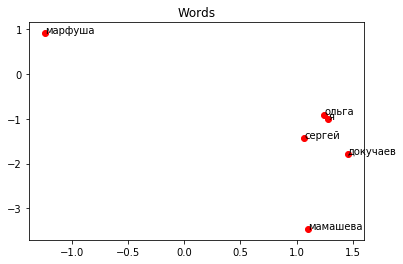

In [75]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

### Замена слов в предложениии

Поскольку слова в модели - леммы, и не всегда ближайшее слово той же части речи, что и исходное, то грамматической связности может не получиться

In [76]:
phrase = 'Ольга умерла сегодня ночью'
result = []
lemm_phrase = []
t_phrase = nltk.word_tokenize(phrase)
for w in t_phrase:
    parseword = morph.parse(w)
    lemm_phrase.append(parseword[0][2])


for lemm in lemm_phrase:
    if lemm in model_cinics.wv.vocab:
        lemm = model_cinics.wv.most_similar(lemm, topn=1)[0][0]
    result.append(lemm)
print(' '.join(result))

просить мысль пойти ночью
